# Data Augmentation
Generating more data off of existing data in order to increase the volumne of available data. Data augmentation techniques include: 
- Flipping the image (vertically/horizontally): this makes the dataset more dynamic, making the objects in the images face one direction or another.
- Rotating 
- Colour change.

Reason for data augmentation:
- To grow our training set. 
- To avoid overfitting (which happens when the data is too small)

**Notes and Reference**
- deeplizard (2020) Performing data augmentation with TensorFlow's Keras API  https://deeplizard.com/learn/video/14syUbL16k4

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [4]:
def plotImages(image_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(image_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [41]:
idg = ImageDataGenerator(rotation_range=10, 
                         width_shift_range=0.5,
                         height_shift_range=0.5,
                         shear_range=0.2,
                         zoom_range=0.3,
                         channel_shift_range=10, 
                         horizontal_flip=True)

In [42]:
chosen_image = random.choice(os.listdir())
chosen_image

'fire638.png'

In [43]:
image_path = "train/fire_train/" + chosen_image

In [44]:
# makes sure if the image is a valid file.
assert os.path.isfile(image_path)

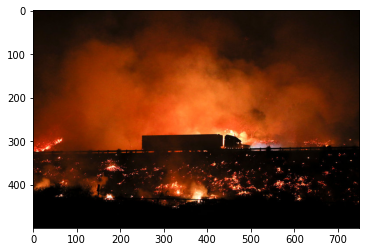

In [46]:
image = np.expand_dims(plt.imread(image_path,0), 0)
plt.imshow(image[0])

In [47]:
# Generate batches of augmented images from this image.
aug_iter = idg.flow(image)

In [48]:
# Get 10 samples of augmented images
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

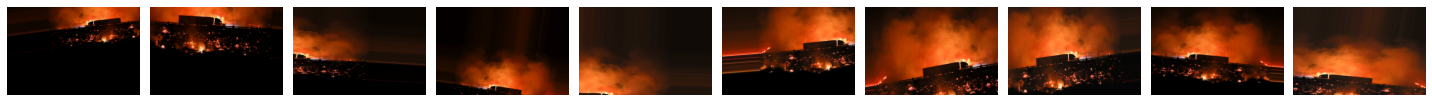

In [51]:
# Augmented images
plotImages(aug_images)

# Error Notes

`ValueError: invalid PNG header`
- `plt.imread(filename, 0)`
- The image file format assumed for reading the data. If not given, the format is deduced from the filename. If nothing can be deduced, PNG is tried.
https://stackoverflow.com/questions/39379609/matplotlib-valueerror-invalid-png-header